<a href="https://colab.research.google.com/github/Avijeetas/learning-machine-learning/blob/master/IOT%20from%20kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

#retrieve uploaded file
uploaded = files.upload()

#print results
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json



In [0]:
!kaggle datasets download atulanandjha/temperature-readings-iot-devices  -f IOT-temp.csv


In [0]:
!unzip IOT-temp.csv

In [0]:
!pip install --upgrade seaborn
!pip install --upgrade numpy

In [0]:
#import packages
import pandas as pd
from pandas import datetime
import numpy as np


#to plot within notebook
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

import seaborn as sns


#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10

In [0]:
!ls

In [0]:
df=pd.read_csv('IOT-temp.csv')
df.name='IOT'
df['Date']=pd.to_datetime(df['noted_date'])
df.head()


In [20]:
drp=['id','room_id/id','noted_date']


df=df.drop(drp,axis=1) #axis =0 hole row
df.shape

(97606, 3)

In [0]:
rows_drop = ['temp', 'out/in', 'Date'] 

# dropping ALL duplicte rows with all same values.

df.drop_duplicates(subset = rows_drop, 
                     keep = False, inplace = True)



**Syntax**: *`DataFrame.drop_duplicates(subset=None, keep=’first’, inplace=False)`*


Parameters:
**subset**: Subset takes a column or list of column label. It’s default value is none. After passing columns, it will consider them only for duplicates.
**keep**: keep is to control how to consider duplicate value. It has only three distinct value and default is ‘first’.

    If ‘first’, it considers first value as unique and rest of the same values as duplicate.
    If ‘last’, it considers last value as unique and rest of the same values as duplicate.
    If False, it consider all of the same values as duplicates

**inplace**: Boolean values, removes rows with duplicates if True.


In [23]:
df.describe()

,temp
count,23075.000000
mean,38.068689
std,6.426103
min,22.000000
25%,32.000000
50%,39.000000
75%,44.000000
max,51.000000


In [0]:
#function for separating day, month ,week and year

def to_conv(df):
  df['Date'] =pd.to_datetime(df['Date'])
  df['Year'] =df['Date'].dt.year
  df['Month']=df['Date'].dt.month
  df['Day']=df['Date'].dt.day
  df['WeekOfYear']=df['Date'].dt.weekofyear
to_conv(df)
  
  

In [0]:
df.head(10)
df=df.drop('Date',axis=1)

array([2018])

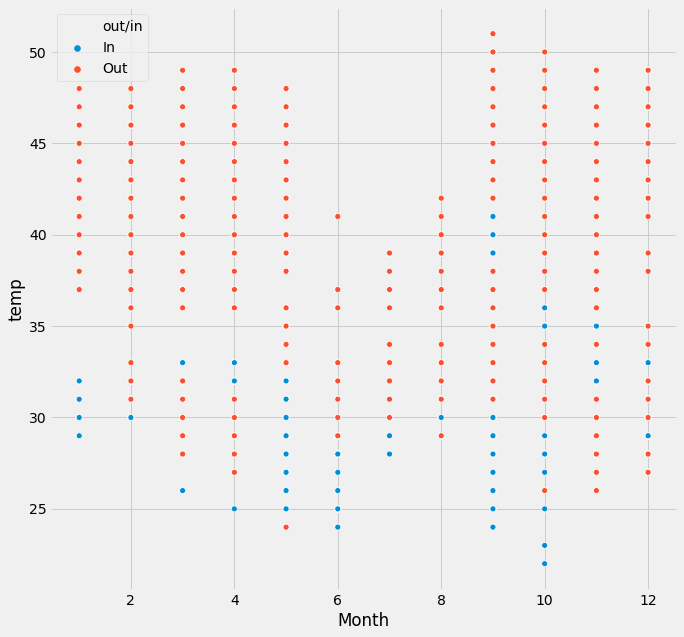

In [32]:
ax=sns.scatterplot(x='Month',y='temp',hue='out/in',data=df)
df.Year.unique()

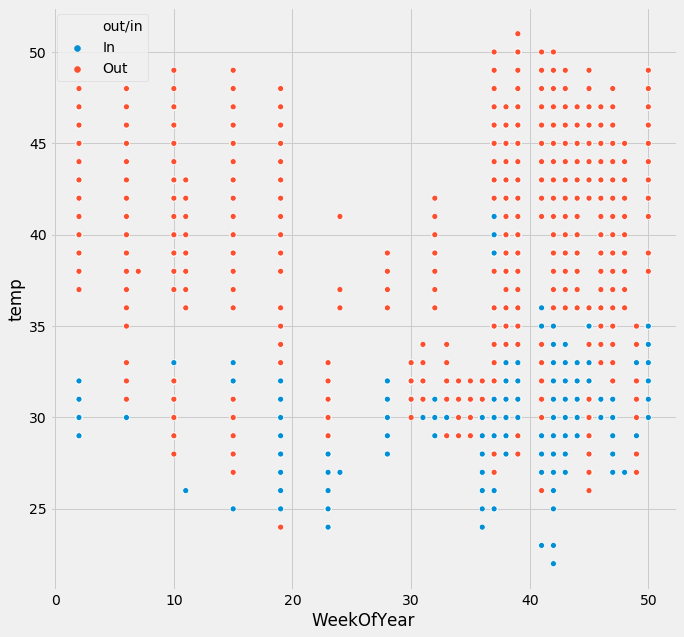

In [30]:
ax=sns.scatterplot(x='WeekOfYear',y='temp',hue='out/in',data=df)


In [31]:

%%HTML
<div class='tableauPlaceholder' id='viz1575283714956' style='position: relative'>
<noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TemperaturePlotsfromIOTData&#47;Dashboard1&#47;1_rss.png' style='border: none' />
</a></noscript>
<object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' />
<param name='embed_code_version' value='3' /> 
<param name='site_root' value='' />
<param name='name' value='TemperaturePlotsfromIOTData&#47;Dashboard1' />
<param name='tabs' value='yes' /><param name='toolbar' value='no' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Te&#47;TemperaturePlotsfromIOTData&#47;Dashboard1&#47;1.png' />
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
</object>
</div>                
<script type='text/javascript'>
var divElement = document.getElementById('viz1575283714956');
var vizElement = divElement.getElementsByTagName('object')[0];
vizElement.style.minWidth='420px';vizElement.style.maxWidth='1150px';vizElement.style.width='100%';
vizElement.style.minHeight='583px';vizElement.style.maxHeight='883px';
vizElement.style.height=(divElement.offsetWidth*0.75)+'px';
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';     
vizElement.parentNode.insertBefore(scriptElement, vizElement);          
</script>

**MAX TEMP : 50 MONTH :SEPT**
**min TEMP : 21  MOnth: march**